## Anomaly Detection

In [47]:
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import KMeans

# Load the dataset
df = pd.read_csv('bank-additional-full.csv', sep=';')

# Preprocess the data
data = pd.get_dummies(df, columns=['job', 'marital', 'education', 'housing', 'month', 'day_of_week'])
data['y'] = df['y'].replace('no', '0')
data['y'] = data['y'].replace('yes', '1')
scaler = StandardScaler()
numerical_columns = ['age', 'duration', 'previous', 'campaign', 'emp.var.rate', 'cons.price.idx',
                      'cons.conf.idx', 'euribor3m', 'nr.employed']
data[numerical_columns] = scaler.fit_transform(df[numerical_columns])

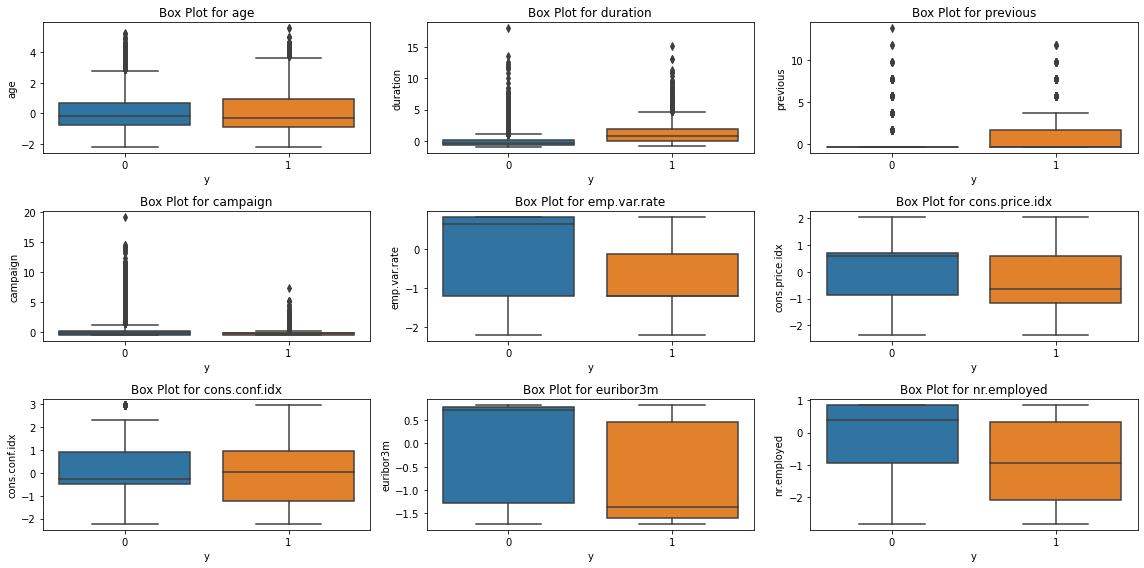

In [16]:
# Different Approaches for Anomaly Detection:

# 1- Box Plot for each variable
plt.figure(figsize=(16, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=data['y'], y=data[column])
    plt.title(f'Box Plot for {column}')
plt.tight_layout()
plt.show()

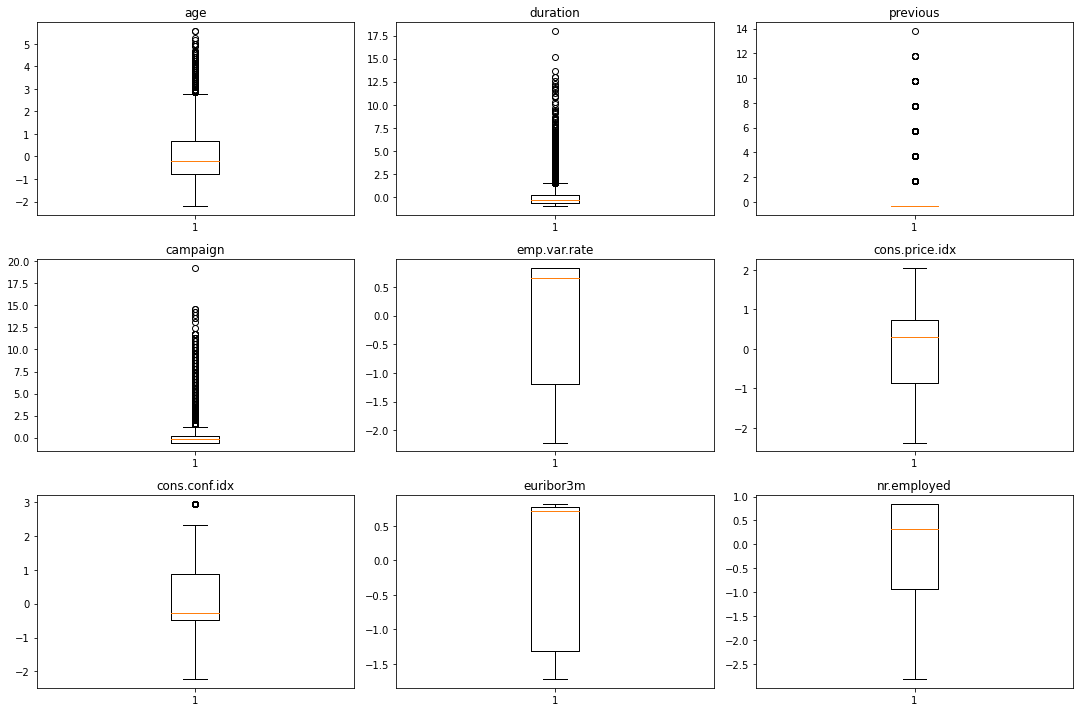

In [17]:
# Select numerical columns for outlier detection
numerical_columns = data[['age', 'duration', 'previous', 'campaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]

# Boxplot for each variable
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns.columns, 1):
    plt.subplot(3, 3, i)  # Use a 3x3 grid for the subplots
    plt.boxplot(numerical_columns[col])
    plt.title(col)

plt.tight_layout()
plt.show()


In [53]:
df[['age', 'duration', 'previous', 'campaign']].describe()

,age,duration,previous,campaign
count,41188.00000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,0.172963,2.567593
std,10.42125,259.279249,0.494901,2.770014
min,17.00000,0.000000,0.000000,1.000000
25%,32.00000,102.000000,0.000000,1.000000
50%,38.00000,180.000000,0.000000,2.000000
75%,47.00000,319.000000,0.000000,3.000000
max,98.00000,4918.000000,7.000000,56.000000


With the plots and table above, I find that features such as age, balance, duration, campaign
and previous all have outliers.

In [28]:
#The average values of numerical variables for different Y values
print("The average values of numerical variables for different Y values: ")
df.pivot_table(['age', 'duration', 'previous', 'campaign'],['y'],aggfunc='mean')

The average values of numerical variables for different Y values: 


,age,campaign,duration,previous
y,,,,
no,39.911185,2.633085,220.844807,0.132374
yes,40.913147,2.051724,553.191164,0.492672


In [14]:
# Select numerical columns for outlier detection
numerical_columns = data[['age', 'duration', 'previous', 'campaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = numerical_columns.quantile(0.25)
Q3 = numerical_columns.quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((numerical_columns < lower_bound) | (numerical_columns > upper_bound)).any(axis=1)

# Display the number of outliers
print("Number of outliers:", outliers.sum())

# Display the indices of the outliers
print("Indices of outliers:", data.index[outliers])

Number of outliers: 10828
Indices of outliers: Int64Index([   37,    57,    61,    75,    83,    88,   111,   131,   164,
              169,
            ...
            41164, 41166, 41170, 41173, 41174, 41175, 41178, 41182, 41183,
            41187],
           dtype='int64', length=10828)


In [33]:
# Display all observations that have outliers
print("Observations with outliers:")
print(data[outliers])

Observations with outliers:
            age  default loan    contact  duration  campaign  pdays  previous  \
37     1.149199       no   no  telephone  5.429405 -0.565922    999 -0.349494   
57     0.477486  unknown   no  telephone  2.039197 -0.565922    999 -0.349494   
61     1.053240       no   no  telephone  2.135619 -0.565922    999 -0.349494   
75     0.093650  unknown   no  telephone  5.078428 -0.565922    999 -0.349494   
83     0.861322  unknown   no  telephone  3.022704 -0.565922    999 -0.349494   
...         ...      ...  ...        ...       ...       ...    ...       ...   
41175 -0.578062       no   no   cellular -0.301937 -0.565922    999  3.691766   
41178  2.108788       no   no   cellular  0.866702 -0.204909      6  5.712397   
41182 -1.057857       no   no   cellular -0.564206 -0.565922      9  1.671136   
41183  3.164336       no   no   cellular  0.292025 -0.565922    999 -0.349494   
41187  3.260295       no   no   cellular -0.074380  0.156105    999  1.671136   


In [49]:
# 2- Distance-based Approach: KNN Outlier Detection
features_distance = data[numerical_cols]
lof = LocalOutlierFactor(n_neighbors=5, contamination=0.1)
outlier_scores_distance = lof.fit_predict(features_distance)
outliers_distance = features_distance[outlier_scores_distance == -1]
print("Number of Distance-based outliers:", len(outliers_distance))
outlier_indices_distance = data.index[outlier_scores_distance == -1]
print("Indices of Distance-based outliers:", outlier_indices_distance)

Number of Distance-based outliers: 4119
Indices of Distance-based outliers: Int64Index([   12,    62,    80,    84,    97,   127,   139,   140,   158,
              162,
            ...
            41152, 41153, 41154, 41156, 41163, 41164, 41165, 41178, 41186,
            41187],
           dtype='int64', length=4119)


In [50]:
# 2- Distance-based Approach: KNN Outlier Detection
features_distance = data[numerical_cols]
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
outlier_scores_distance = lof.fit_predict(features_distance)
outliers_distance = features_distance[outlier_scores_distance == -1]
print("Number of Distance-based outliers:", len(outliers_distance))
outlier_indices_distance = data.index[outlier_scores_distance == -1]
print("Indices of Distance-based outliers:", outlier_indices_distance)

Number of Distance-based outliers: 4119
Indices of Distance-based outliers: Int64Index([    8,    26,    31,    84,   160,   163,   192,   228,   278,
              288,
            ...
            41157, 41160, 41161, 41164, 41166, 41174, 41177, 41184, 41186,
            41187],
           dtype='int64', length=4119)


In [51]:
# 2- Distance-based Approach: KNN Outlier Detection
features_distance = data[numerical_cols]
lof = LocalOutlierFactor(n_neighbors=100, contamination=0.1)
outlier_scores_distance = lof.fit_predict(features_distance)
outliers_distance = features_distance[outlier_scores_distance == -1]
print("Number of Distance-based outliers:", len(outliers_distance))
outlier_indices_distance = data.index[outlier_scores_distance == -1]
print("Indices of Distance-based outliers:", outlier_indices_distance)

Number of Distance-based outliers: 4119
Indices of Distance-based outliers: Int64Index([    9,    20,    84,   105,   110,   111,   192,   244,   288,
              355,
            ...
            41123, 41124, 41126, 41136, 41144, 41153, 41159, 41164, 41174,
            41183],
           dtype='int64', length=4119)


In [35]:
# Display all observations that have Distance-based outliers
print("Observations with Distance-based outliers:")
print(data.loc[outlier_indices_distance])

Observations with Distance-based outliers:
            age default loan    contact  duration  campaign  pdays   previous  \
8     -1.537652      no   no  telephone  0.469442 -0.565922    999  -0.349494   
26     1.820911      no   no  telephone -0.637486 -0.565922    999  -0.349494   
31     1.820911      no   no  telephone  0.492583 -0.565922    999  -0.349494   
84    -0.194227      no  yes  telephone -0.919040 -0.565922    999  -0.349494   
160   -1.537652      no   no  telephone -0.359790 -0.204909    999  -0.349494   
...         ...     ...  ...        ...       ...       ...    ...        ...   
41174  2.108788      no   no   cellular -0.193944 -0.565922      1  11.774288   
41177  1.628993      no   no   cellular -0.517923  1.239145    999  -0.349494   
41184  0.573445      no   no   cellular  0.481012 -0.565922    999  -0.349494   
41186  0.381527      no   no   cellular  0.708569 -0.565922    999  -0.349494   
41187  3.260295      no   no   cellular -0.074380  0.156105    999

In [7]:
# 3- Density-based Approach: DBSCAN
features_density = data[numerical_cols]
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_density = dbscan.fit_predict(features_density)
outliers_density = features_density[labels_density == -1]
print("Number of Density-based outliers:", len(outliers_density))

Number of Density-based outliers: 2670


In [41]:
# Identify outliers based on DBSCAN labels
outliers_density_indices = data.index[labels_density == -1].tolist()
outliers_density = data.loc[outliers_density_indices]

print("Number of Density-based outliers:", len(outliers_density_indices))

# Display the indices of the Density-based outliers
print("Indices of Density-based outliers:", outliers_density_indices)

# Display all observations that have Density-based outliers
if not outliers_density.empty:
    print("Observations with Density-based outliers:")
    print(outliers_density)
else:
    print("No observations with Density-based outliers.")

Number of Density-based outliers: 2670
Indices of Density-based outliers: [37, 164, 590, 943, 1114, 1396, 1689, 1791, 1809, 1839, 1853, 1980, 2031, 2105, 2313, 2330, 2610, 2970, 3127, 3219, 3370, 3413, 3418, 3427, 3438, 3484, 3514, 3532, 3539, 3652, 3671, 3770, 3772, 3773, 3774, 3785, 3809, 3817, 3854, 3868, 3872, 3892, 4039, 4045, 4056, 4107, 4114, 4139, 4140, 4152, 4164, 4168, 4176, 4213, 4221, 4264, 4353, 4410, 4456, 4575, 4650, 4847, 4880, 4897, 4902, 4942, 4978, 5017, 5043, 5073, 5112, 5304, 5337, 5384, 5386, 5415, 5476, 5530, 5550, 5564, 5699, 5784, 5791, 5894, 5948, 6100, 6203, 6280, 6365, 6394, 6531, 6534, 6619, 6738, 6778, 6860, 7155, 7251, 7277, 7297, 7302, 7390, 7542, 7544, 7613, 7629, 7700, 7714, 7719, 7727, 7753, 7841, 7945, 8014, 8016, 8097, 8099, 8101, 8102, 8125, 8130, 8222, 8233, 8246, 8301, 8339, 8346, 8362, 8379, 8417, 8435, 8437, 8455, 8471, 8489, 8528, 8529, 8617, 8637, 8640, 8643, 8661, 8712, 8740, 8765, 8952, 9013, 9048, 9057, 9072, 9095, 9149, 9160, 9196, 9205, 